In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, chi2_contingency
import math

### Read the data

In [3]:
df = pd.read_csv('train.csv', index_col='id')

# Remove Unneccessary columns e.g. Unamed Columns and id
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Retrieve numerical, ordinal, nominal column names 
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 
nominal_columns = df.select_dtypes(include=['object']).columns.to_list()
ordinal_columns = [col for col in df.columns if (col not in numerical_columns and col not in nominal_columns) ]

# Impute the missing values in Arrival Delay with median
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace=True)

target_variable = 'satisfaction'
target_categories = df[target_variable].unique()

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Features Description and Type

| Variable Name                       | Variable Description                                              | Variable Type | Values                                                  |
| ----------------------------------- | ---------------------------------------------------------------- | -------------- | ------------------------------------------------------- |
| Gender                              | Gender of the passengers                                         | Nominal        | Female, Male                                            |
| Customer Type                       | The customer type                                                | Nominal        | Loyal customer, Disloyal customer                       |
| Age                                 | The actual age of the passengers                                | Numerical      | -                                                       |
| Type of Travel                      | Purpose of the flight of the passengers                         | Nominal        | Personal Travel, Business Travel                       |
| Class                               | Travel class in the plane of the passengers                     | Nominal        | Business, Eco, Eco Plus                                |
| Flight Distance                     | The flight distance of this journey                             | Numerical      | -                                                       |
| Inflight wifi service               | Satisfaction level of the inflight wifi service                 | Ordinal        | 1, 2, 3, 4, 5                                          |
| Departure/Arrival time convenient   | Satisfaction level of Departure/Arrival time convenient         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Ease of Online booking              | Satisfaction level of online booking                            | Ordinal        | 1, 2, 3, 4, 5                                          |
| Gate location                       | Satisfaction level of Gate location                             | Ordinal        | 1, 2, 3, 4, 5                                          |
| Food and drink                      | Satisfaction level of Food and drink                            | Ordinal        | 1, 2, 3, 4, 5                                          |
| Online boarding                     | Satisfaction level of online boarding                           | Ordinal        | 1, 2, 3, 4, 5                                          |
| Seat comfort                        | Satisfaction level of Seat comfort                             | Ordinal        | 1, 2, 3, 4, 5                                          |
| Inflight entertainment              | Satisfaction level of inflight entertainment                    | Ordinal        | 1, 2, 3, 4, 5                                          |
| On-board service                    | Satisfaction level of On-board service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Leg room service                    | Satisfaction level of Leg room service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Baggage handling                    | Satisfaction level of baggage handling                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Check-in service                    | Satisfaction level of Check-in service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Inflight service                    | Satisfaction level of inflight service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Cleanliness                         | Satisfaction level of Cleanliness                              | Ordinal        | 1, 2, 3, 4, 5                                          |
| Departure Delay in Minutes          | Minutes delayed when departure                                 | Numerical      | -                                                       |
| Arrival Delay in Minutes            | Minutes delayed when Arrival                                   | Numerical      | -                                                       |
| Satisfaction                        | Airline satisfaction level                                     | Nominal        | Satisfaction, Neutral, Dissatisfaction                 |


### Central Tendancy and Spread of features
Measures computed for each type
- For Numerical: Mean, Median, std, 1st and 3rd quartiles
- For Ordinal: Mode, Median, IQR, entropy
- For Nominal: Mode, entropy

In [4]:
# Studing the central Tendancy and spread of Numerical Features
df.loc[:, numerical_columns].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Conclusions:
- All ages are represented in the data with a balanced frequency
- The majority (75%) of delays are below 13 minutes, with very few cases exceeding this threshold. These cases may indicate a disaster or a serious circumstance that requires investigation. As such, they can be considered as outliers, as they are rare and not representative of the normal cases.

In [5]:
# Studing the central Tendancy and spread of Ordinal Features
percentiles = df.loc[:, ordinal_columns].describe().drop(['mean', 'std'])
Mode = df.loc[:, ordinal_columns].mode().rename(index={0: 'mode'})
statistics = pd.concat([percentiles, Mode])
statistics

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
50%,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0
75%,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mode,3.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


Conclusions:
- Seat comfort, inflight service, and baggage handling received high ratings, with 50% of the flights rating them as 4 or above.

In [6]:
def calc_entropy(values, calc_max):
    if calc_max:
        values_count = len(pd.Series(values).unique())
        value_counts = [1/values_count]*values_count
    else:
        value_counts = pd.Series(values).value_counts(normalize=True)
    entropy = -sum(p * math.log(p) for p in value_counts)
    return entropy

# Studing the central Tendancy and spread of Nominal Features
mode = df.loc[:, nominal_columns].mode().rename(index={0: 'mode'})
entropies = pd.DataFrame(df[nominal_columns].apply(calc_entropy, calc_max=False), index=nominal_columns, columns=["Entropy"]).T
max_entropies = pd.DataFrame(df[nominal_columns].apply(calc_entropy, calc_max=True), index=nominal_columns, columns=["Max Entropy"]).T
statistics = pd.concat([mode, entropies, max_entropies])
statistics

,Gender,Customer Type,Type of Travel,Class,satisfaction
mode,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
Entropy,0.693036,0.47543,0.619399,0.901828,0.684232
Max Entropy,0.693147,0.693147,0.693147,1.098612,0.693147


Conclusion:
- All nominal variables has a large entropy value which indicate high randomness or low predictability. This is likely due to the categorical variables being more evenly distributed across multiple categories, resulting in a higher entropy value.

## Multivariate Insights & Visualizations

### Distribution of numerical variables per class

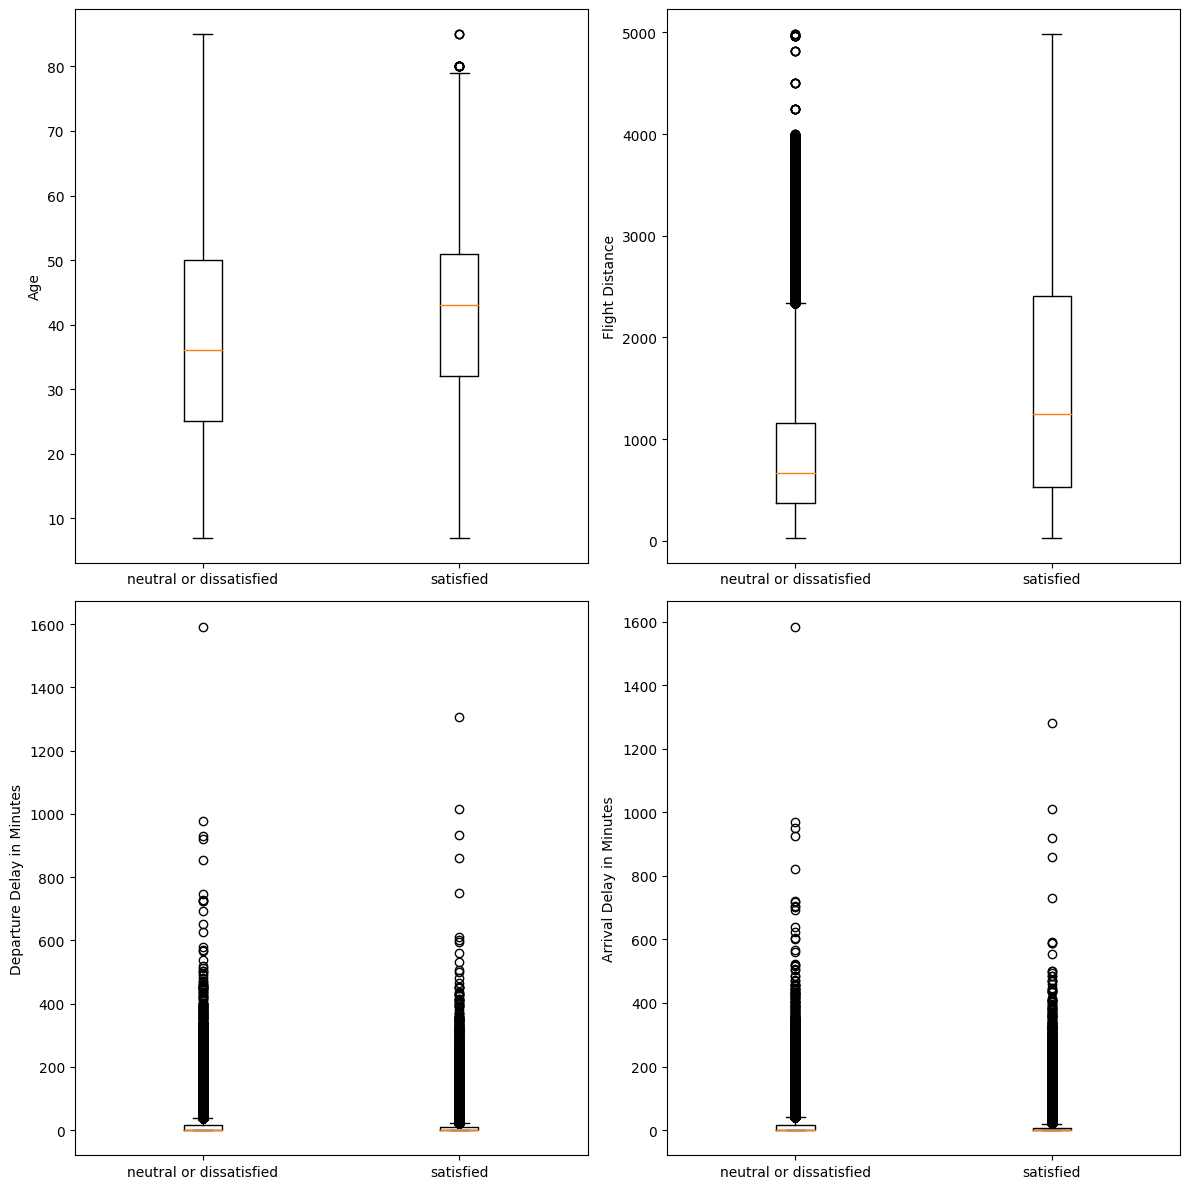

In [7]:
# Boxplot for numerical variables w.r.t the target variable (satisfaction)
plt.figure(figsize=(12, 12))
for i, numerical_col in enumerate(numerical_columns):
    ax = plt.subplot(2, len(numerical_columns)//2, i+1)
    ax.boxplot([df[numerical_col][df[target_variable]==category] for category in target_categories])
    ax.set_xticklabels(df[target_variable].unique())
    ax.set_ylabel(numerical_col)
plt.tight_layout()
plt.show()

### Distribution of numerical and categorical combinations per class

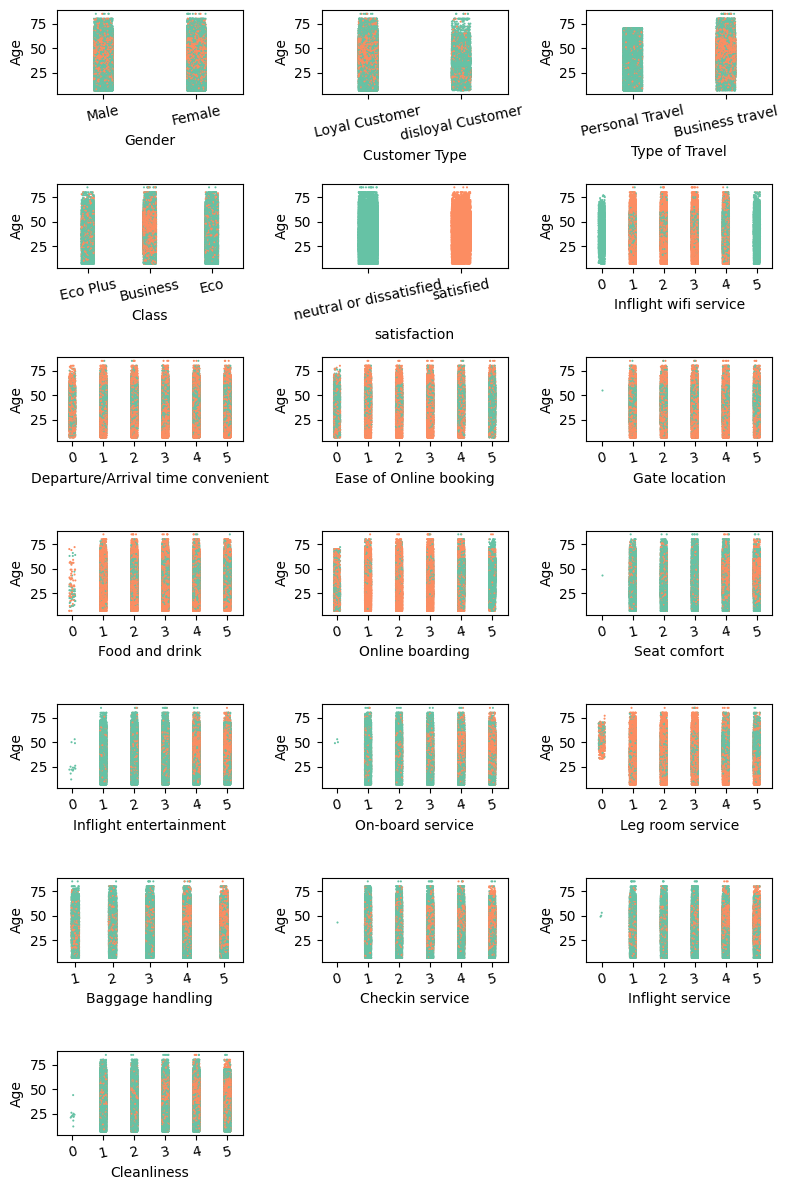

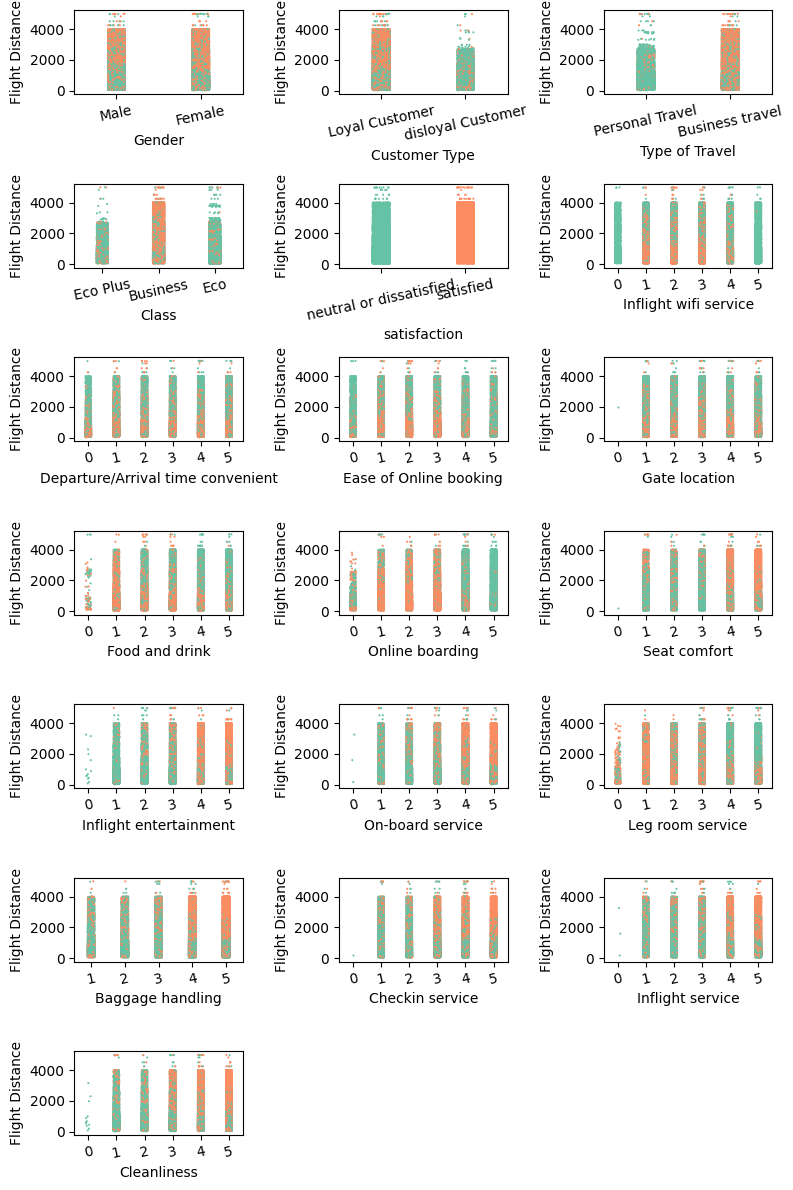

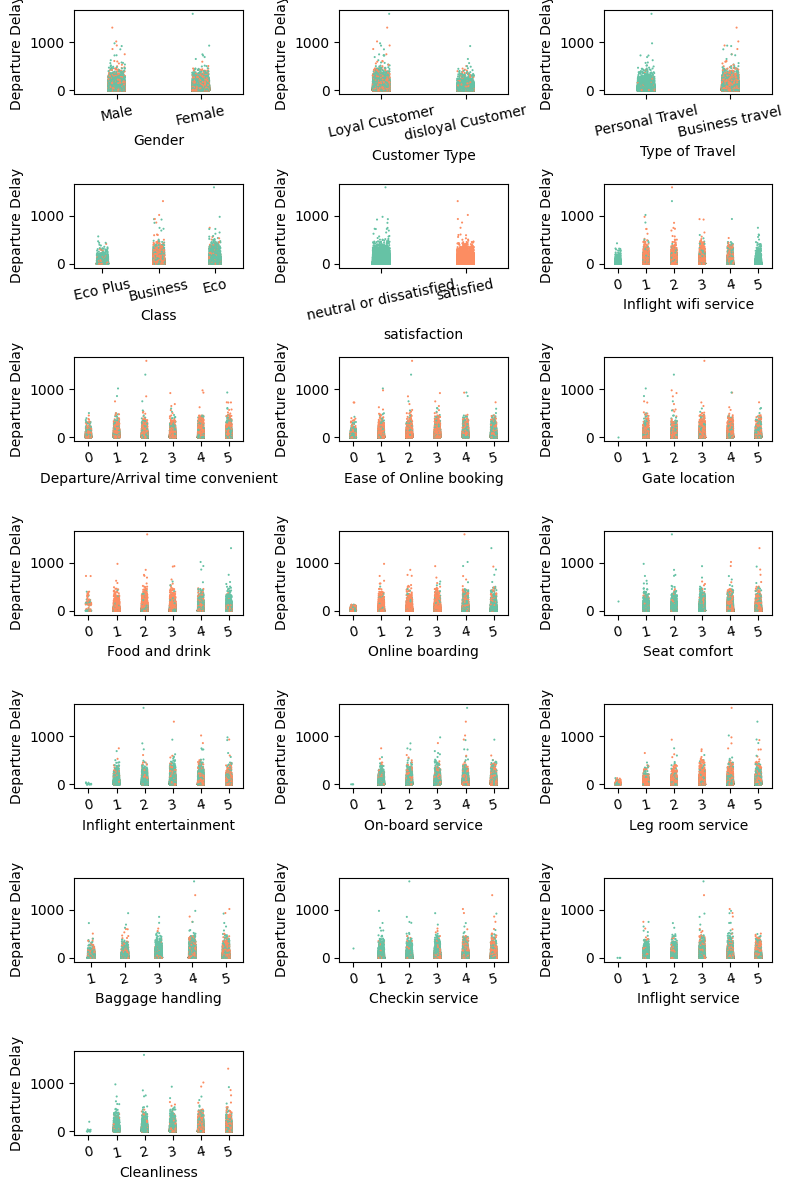

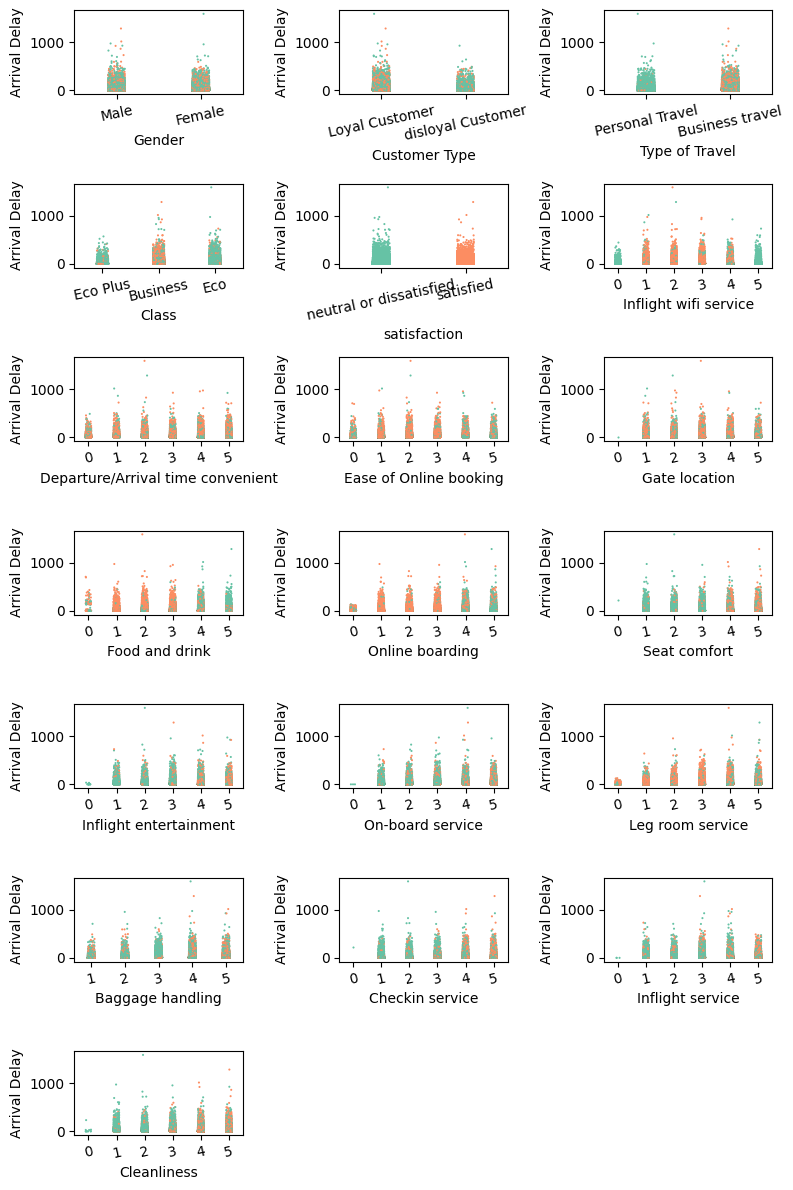

In [61]:
for numerical_col in numerical_columns:
    plt.figure(figsize=(8, 12))
    for i, categorical_col in enumerate(nominal_columns+ordinal_columns):
        ax = plt.subplot(7, 3, i+1)
        sns.stripplot(x=categorical_col, y=numerical_col, hue=target_variable, data=df, palette='Set2', legend=False, size=1.5)
        ax.set_ylabel(numerical_col if "in Minutes" not in numerical_col else numerical_col[:-11])
        ax.tick_params(axis='x', labelrotation=12)
    plt.tight_layout()
    plt.show()

### Independence between nominal variables
P-value smaller than 0.05 indicates dependancy

In [33]:
p_value_df = pd.DataFrame(index=nominal_columns, columns=nominal_columns)

for col_i in nominal_columns:
    for col_j in nominal_columns:
        contingency_table = pd.crosstab(df[col_i], df[col_j])
        # Perform chi-square test
        chi2, p_value, dof, ex = chi2_contingency(contingency_table)
        p_value_df.at[col_i, col_j] = p_value

p_value_df

,Gender,Customer Type,Type of Travel,Class,satisfaction
Gender,0.0,0.0,0.026398,0.000119,0.000085
Customer Type,0.0,0.0,0.0,0.0,0.0
Type of Travel,0.026398,0.0,0.0,0.0,0.0
Class,0.000119,0.0,0.0,0.0,0.0
satisfaction,0.000085,0.0,0.0,0.0,0.0


### Monotonic Association between ordinal variables

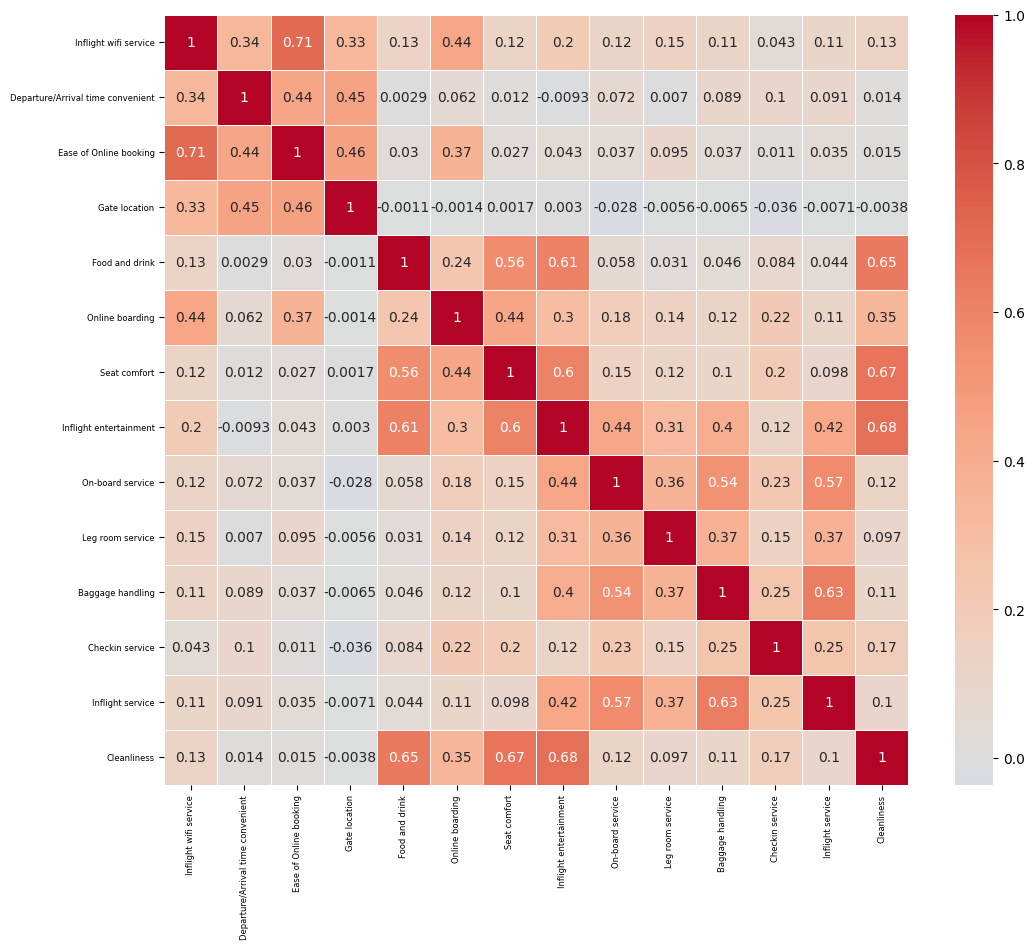

In [58]:
df_ordinal = df.loc[:, ordinal_columns]
corr = df_ordinal.corr(method='spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Increase the figsize as desired
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

Conclusions:
- High correlation between Ease of online booking and quality of wifi service. 
    - Yet can't interpret this correlation.
- It seems that flights that have high cleanliness also have good food, comfort seat and good entertainment, where there exists High Correlation between:
    - Cleanliness and food and drink
    - Cleanliness and seatcomfort
    - Cleanliness and inflight entertainment
